### NAME: BUSHRA HOSSAIN
### IternID: i23b0034s26
##### Day: 5
##### Task: 2

In [2]:
import openpyxl
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [4]:
fact_table = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Fact_table', engine='openpyxl')

 
item_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Item_dim', engine='openpyxl')

 
customer_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Customer_dim', engine='openpyxl')

 
time_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Time_dim', engine='openpyxl')

store_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Store_dim', engine='openpyxl')

print("Successfully Loaded the Dataset!")

Successfully Loaded the Dataset!



### Practice problem 6.1

Show the unit price frequency of the fact table using Displot.

Text(0.5, 1.0, 'Unit Price Frequency')

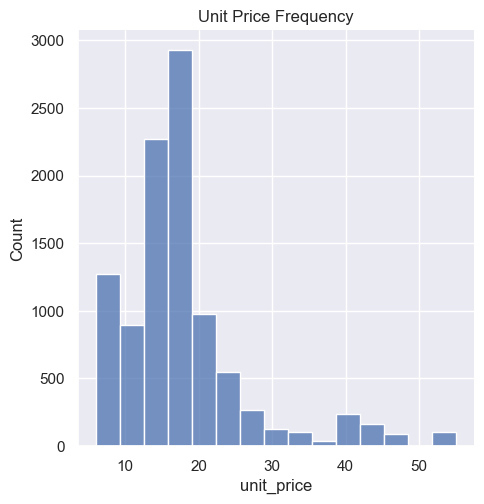

In [5]:

sns.set(style="darkgrid") 
sns.displot(x=fact_table['unit_price'], bins=15);
plt.title("Unit Price Frequency")


### Practice problem 6.2

Show the quantity vs total price into a Join plot where the kind must be scatter.

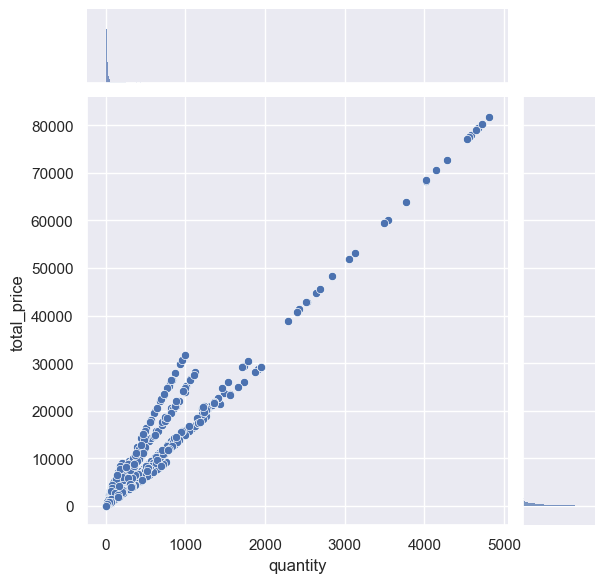

In [6]:
sns.jointplot(x=fact_table['quantity'],y=fact_table['total_price'],kind='scatter')

### Practice problem 6.3

Show the item_dim into a pair plot.

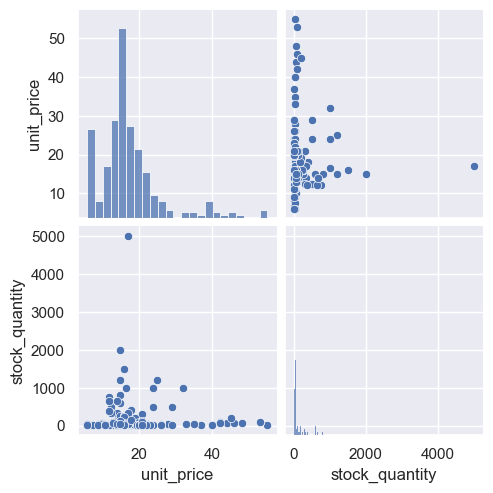

In [7]:
sns.pairplot(item_dim)

### Practice problem 6.4

Find the Quarter-wise average sales price and plot it into a pie chart.

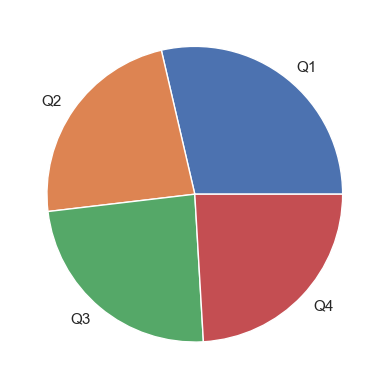

In [8]:
add_item_time_with_fact = pd.merge(pd.merge(fact_table,time_dim, on='time_key'),item_dim, on='item_key')
df=add_item_time_with_fact.groupby('quarter')['total_price'].mean().reset_index()
plt.pie(labels=df.quarter, x=df.total_price)
plt.show()


### Practice problem 6.5

Show the unit count from the fact table into a count plot

<Axes: xlabel='count', ylabel='unit'>

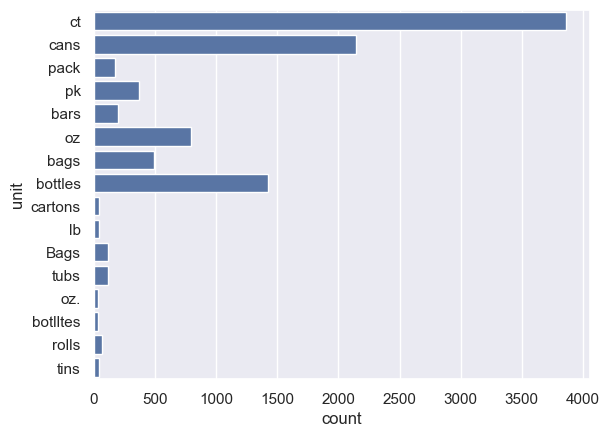

In [9]:
sns.countplot(fact_table['unit'])

### Practice Problem 6.7

Compare the total sales price in year-wise quarterly between Dhaka and Chittagong, and plot it into a Scatter Chart.

In [10]:

add_customer_time_with_fact = pd.merge(pd.merge(fact_table, time_dim, on='time_key'), customer_dim, on='coustomer_key')


 

dhaka_div = add_customer_time_with_fact.query("division == 'Dhaka'")

d = dhaka_div.groupby('year').aggregate({'total_price': 'sum'}).reset_index()


 

 

chittagong_div = add_customer_time_with_fact.query("division == 'Chittagong'")

c = chittagong_div.groupby('year').aggregate({'total_price': 'sum'}).reset_index()


In [11]:
add_customer_time_with_fact

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,...,quarter,year,name,contact_no,nid,address,street,upazila,district,division
0,P025,C001495,T08774,I00185,S0038,19,ct,14.00,266.00,08-06-2021 23:18,...,Q2,2021,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
1,P015,C001495,T08338,I00008,S0015,24,cans,16.25,390.00,18-02-2021 21:55,...,Q1,2021,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
2,P025,C001495,T02924,I00034,S0005,19,cans,16.00,304.00,23-10-2016 22:45,...,Q4,2016,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
3,P027,C001495,T01362,I00031,S0026,11,cans,16.00,176.00,25-04-2022 05:46,...,Q2,2022,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
4,P020,C001495,T00256,I00201,S0024,5,bars,23.00,115.00,22-05-2020 14:55,...,Q2,2020,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,P031,C000379,T08995,I00145,S0043,319,ct,17.00,5423.00,30-06-2018 01:56,...,Q2,2018,jitender,8801651547315,2102034287287,"514, Iqbal Road, Mohammadpur, Dhaka-1207","514, Iqbal Road",Mohammadpur,Dhaka,Dhaka
9996,P038,C000379,T08880,I00010,S0021,1,cans,6.75,6.75,31-10-2015 10:27,...,Q4,2015,jitender,8801651547315,2102034287287,"514, Iqbal Road, Mohammadpur, Dhaka-1207","514, Iqbal Road",Mohammadpur,Dhaka,Dhaka
9997,P036,C000666,T03804,I00150,S0011,16,bags,16.00,256.00,24-12-2018 22:12,...,Q4,2018,divya,8801982495444,8375355196536,"Rurual Development Officer, BRDB Gournadi, Bar...","Rurual Development Officer, BRDB Gournadi",Gournadi,Barishal,Barishal
9998,P009,C000521,T05526,I00098,S0009,54,oz,10.00,540.00,18-03-2017 20:42,...,Q1,2017,abhinav vashit,8801510794174,2370175929783,"House-08, Road-10/A, Sec-09, Uttara","House-08, Road-10/A, Sec-09",Uttara,Dhaka,Dhaka


C:\Users\BUSHRA\AppData\Local\Temp\ipykernel_7632\49070396.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=d, x='year', y='total_price', sizes=(50, 300), palette='Greens')
C:\Users\BUSHRA\AppData\Local\Temp\ipykernel_7632\49070396.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=c, x='year', y='total_price', sizes=(50, 300), palette='Reds')


<Axes: xlabel='year', ylabel='total_price'>

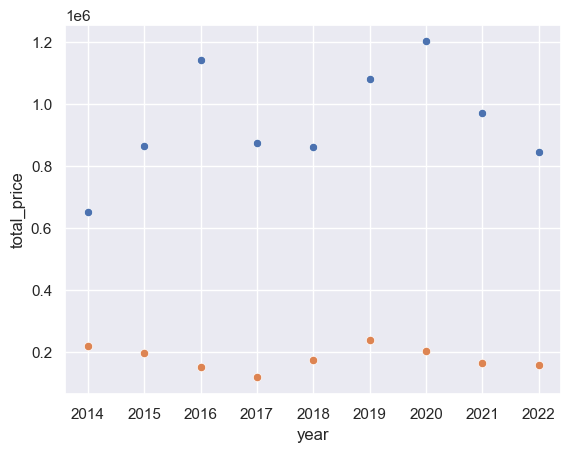

In [12]:
sns.scatterplot(data=d, x='year', y='total_price', sizes=(50, 300), palette='Greens')
sns.scatterplot(data=c, x='year', y='total_price', sizes=(50, 300), palette='Reds')

### Practice Problem 6.8

Break down the total sales of items geographically (division-wise).

    1.Plot division-wise total sales price into SwarmChart.
    2.Plot item-wise total sales price into SwarmChart.

C:\Users\BUSHRA\AppData\Local\Temp\ipykernel_7632\2470135221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=division_item_sales, x='division', y='total_price', palette='Set2')
d:\intership411\daenv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 89.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\intership411\daenv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\intership411\daenv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning

Text(0.5, 1.0, 'Division-wise Total Sales Price')

d:\intership411\daenv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 91.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\intership411\daenv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\intership411\daenv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 76.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\intership411\daenv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 91.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


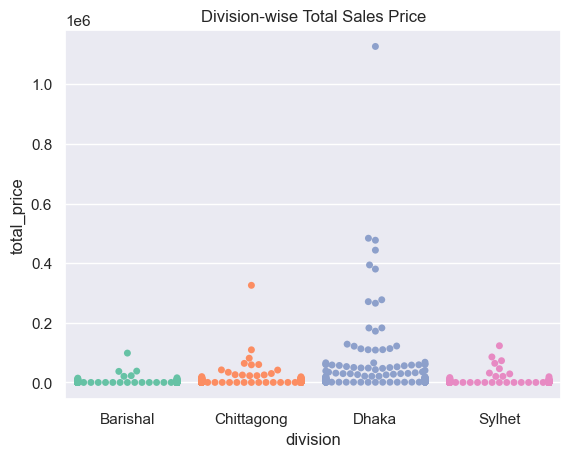

In [13]:
division_item_sales = add_customer_time_with_fact.groupby(['division', 'item_key'])['total_price'].sum().reset_index()

sns.swarmplot(data=division_item_sales, x='division', y='total_price', palette='Set2')
plt.title("Division-wise Total Sales Price")




C:\Users\BUSHRA\AppData\Local\Temp\ipykernel_7632\2174267407.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=division_item_sales, x='item_key', y='total_price', palette='Set2')
d:\intership411\daenv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\intership411\daenv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\intership411\daenv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning

Text(0.5, 1.0, 'Item-wise Total Sales Price')

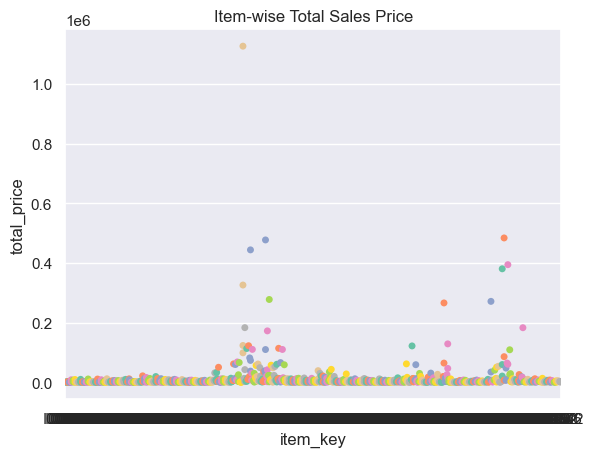

In [14]:
sns.swarmplot(data=division_item_sales, x='item_key', y='total_price', palette='Set2')
plt.title("Item-wise Total Sales Price")

### Practice Problem 6.9

Break down year-wise the total sales geographically (division-wise) and plot it into Stripplot.

<Axes: xlabel='total_price', ylabel='division'>

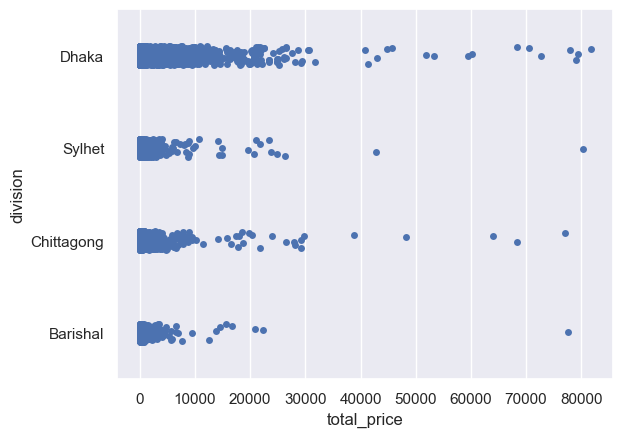

In [15]:

sns.stripplot(y = add_customer_time_with_fact['division'], x = add_customer_time_with_fact['total_price'])


In [17]:
import seaborn as sns
df = sns.load_dataset("titanic")

### Practice problem 6.10

What was the distribution of Ages for passengers in different classes?

C:\Users\BUSHRA\AppData\Local\Temp\ipykernel_7632\1079794876.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='pclass', y='age', palette='viridis')


<Axes: xlabel='pclass', ylabel='age'>

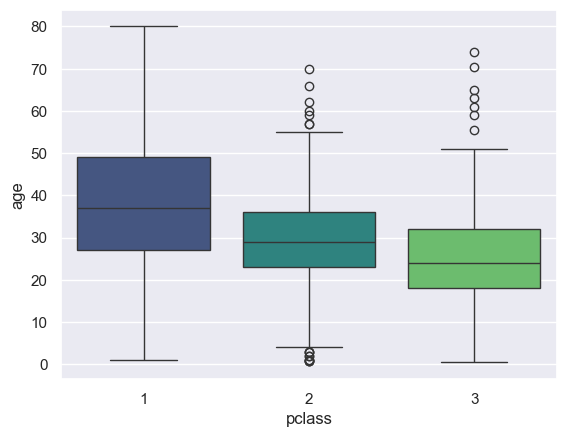

In [18]:
sns.boxplot(data=df, x='pclass', y='age', palette='viridis')